<h1>NumPy Sorting Arrays</h1>

In [1]:
# Algorithms related to sorting values in NumPy arrays
import numpy as np

In [3]:
# Selection sort: Selection sort repeatedly finds the minimum value from a list and makes swaps until the list
# is sorted
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i],x[swap]) = (x[swap],x[i])
    return x

In [4]:
# Pass elements for selection sort
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [5]:
# Bogosort : Random implementation and applies random shuffle until the result happens to be sorted.
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [6]:
# Pass elements for bogo sort
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

<h3>Fast Sorting in NumPy: np.sort and np.argsort</h3>

In [7]:
# np.sort uses O|N logN| quick sort algorithm
# To return a sorted version of an array without modifying the input:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [8]:
# To sort the array in place we can leverage sort method of arrays
x.sort()
print(x)

[1 2 3 4 5]


In [9]:
# argsort function returns the indices of sorted array elements:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [10]:
# These indices can be used via fancy indexing to construct the sorted array if desired:
x[i]

array([1, 2, 3, 4, 5])

<h4>Sorting along rows or columns</h4>

In [11]:
# A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns
# of a multidimensional array using the axis argument. 
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [12]:
# Sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [13]:
# Sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

<h3>Partial Sorts: Partitioning</h3>

In [14]:
# Numpy provides np.partition function
#   - takes an array and a number K
# the result is a new array with the smallest K values to the left of the partition and remaining values to the
# right in arbitrary order.
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [15]:
# Sorting can be done along arbitrary axis of a multidimensional array:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [16]:
# The result is an array where the first two slots in each row contain the smallest values from the row
# with the remaining values filling the remaining slots
# There is a method named np.argpartition that computes indices of the partition. 

<h3>Example: k-nearest neighbours</h3>

In [17]:
# Create a standard 10x2 array
X = rand.rand(10,2)

In [18]:
# Create scatter plot of these array points
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

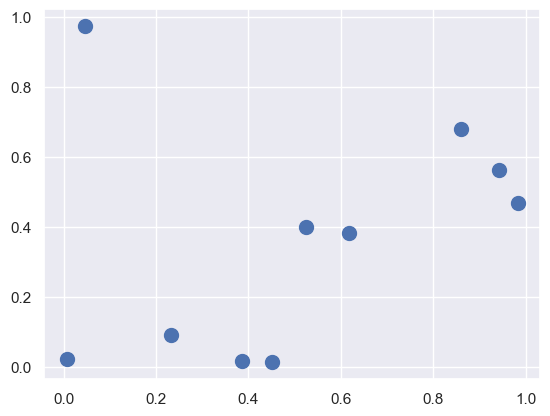

In [19]:
plt.scatter(X[:,0],X[:,1], s = 100);

In [20]:
# We can compute the matrix of square distances in a single line of code:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) **2, axis=-1)

In [21]:
# For each pair of points, compute the differences in their coordinates:
differences = X[:,np.newaxis,:] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [22]:
# Square the coordinate differences
sq_differences = differences * 2;
sq_differences.shape

(10, 10, 2)

In [23]:
# Sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [24]:
# The diagonal of this matrix that is the set of distances between each point and itself is zeros. 
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
# We can use np.argsort to sort along each row. 
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]]


In [29]:
# np.argpartition function
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]
 [6 8 5 2 4 1 7 9 3 0]]


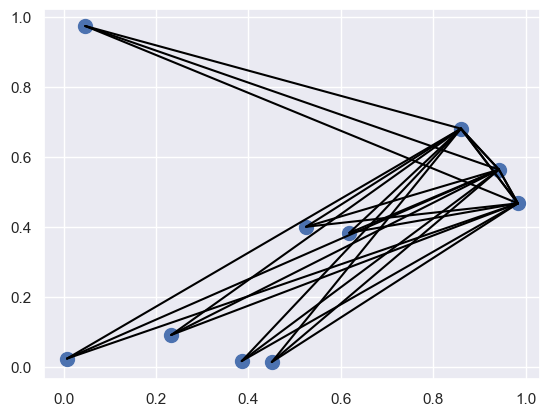

In [32]:
# Create plot
plt.scatter(X[:,0], X[:,1],s=100)

# Draw lines from each point to its two nearest neighbors
K =2

for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(X[j],X[i]), color="black");